# Data Science Challenge

In [ ]:
# If you'd like to install packages that aren't installed by default, uncomment the last two lines of this cell and replace <package list> with a list of your packages.
# This will ensure your notebook has all the dependencies and works everywhere

#import sys
#!{sys.executable} -m pip install <package list>

In [ ]:
#Libraries
import pandas as pd
import numpy as np
import missingno as mno
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import LabelBinarizer, Normalizer
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
import warnings
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_log_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", 101)

## Data Description

Column | Description
:---|:---
`id` | Record index
`timestamp` | Datetime (YYYY:MM:DD HH:MM:SS) when data was collected
`country` | Current country of employment
`employment_status` | Whether a candidate is Full time, Part time, Independent or freelancer or company owner
`job_title` | Current job title of the candidate
`job_years` | Total job experience (in Years)
`is_manager` | Whether the candidate holds a managerial position or not (Yes or No)
`hours_per_week` | No. of hours per day committed to the current job
`telecommute_days_per_week` | No. of telecommuting days per week (working from home)
`education` | The highest degree in education the candidate has received
`is_education_computer_related` | Is the education related to the field of computer science (Yes or No)
`certifications` | Does the candidate have any relevant certifications (Yes or No)
`salary` | Monthly Salary (in US $$)

## Data Wrangling & Visualization

In [ ]:
# Dataset is already loaded below
data = pd.read_csv("train.csv")

In [ ]:
# Dimensions of training data
data.shape

(4277, 13)

In [ ]:
# Print first few rows of data
data.head()

,id,timestamp,country,employment_status,job_title,job_years,is_manager,hours_per_week,telecommute_days_per_week,education,is_education_computer_related,certifications,salary
0,1,12/11/2018 10:52:26,Slovenia,Full time,Developer,4.78393,Yes,40.0,0.0,Bachelors (4 years),Yes,No,7187.743094
1,2,1/5/2017 16:57:50,United States,Full time,DBA,5.00000,No,40.0,5.0,Bachelors (4 years),Yes,No,10000.000000
2,3,12/18/2017 8:13:15,Sweden,Full time,DBA,1.00000,No,40.0,0.0,Masters,Yes,Yes,7000.000000
3,4,12/27/2018 4:56:52,United States,Full time,DBA,1.00000,No,40.0,2.0,Bachelors (4 years),No,No,8333.000000
4,5,12/11/2018 14:07:58,United States,Full time,Developer,3.00000,No,40.0,2.0,Masters,Yes,Yes,7137.000000


In [ ]:
# Explore columns
data.columns

Index(['id', 'timestamp', 'country', 'employment_status', 'job_title',
       'job_years', 'is_manager', 'hours_per_week',
       'telecommute_days_per_week', 'education',
       'is_education_computer_related', 'certifications', 'salary'],
      dtype='object')

In [ ]:
# Description
data.describe()

,id,job_years,hours_per_week,telecommute_days_per_week,salary
count,4277.00000,4277.000000,4260.000000,4266.000000,4277.000000
mean,2139.00000,4.479697,40.859110,1.034927,7057.701984
std,1234.80788,1.990783,1.754911,1.651160,1308.572568
min,1.00000,0.000000,37.000000,0.000000,3622.000000
25%,1070.00000,3.407156,40.000000,0.000000,6496.788236
50%,2139.00000,4.640830,40.000000,0.000000,7166.000000
75%,3208.00000,5.000000,41.114138,1.000000,7614.831964
max,4277.00000,10.000000,45.000000,5.000000,10625.000000


In [ ]:
# Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
id                               4277 non-null int64
timestamp                        4277 non-null object
country                          4277 non-null object
employment_status                4277 non-null object
job_title                        4277 non-null object
job_years                        4277 non-null float64
is_manager                       4277 non-null object
hours_per_week                   4260 non-null float64
telecommute_days_per_week        4266 non-null float64
education                        4277 non-null object
is_education_computer_related    4261 non-null object
certifications                   4277 non-null object
salary                           4277 non-null float64
dtypes: float64(4), int64(1), object(8)
memory usage: 434.5+ KB


In [ ]:
# Check Datatypes
data.dtypes

id                                 int64
timestamp                         object
country                           object
employment_status                 object
job_title                         object
job_years                        float64
is_manager                        object
hours_per_week                   float64
telecommute_days_per_week        float64
education                         object
is_education_computer_related     object
certifications                    object
salary                           float64
dtype: object

In [ ]:
# Check for any missing values
data.isnull().values.any()

True

In [ ]:
# Print total missing values in each column
data.isnull().sum()

id                                0
timestamp                         0
country                           0
employment_status                 0
job_title                         0
job_years                         0
is_manager                        0
hours_per_week                   17
telecommute_days_per_week        11
education                         0
is_education_computer_related    16
certifications                    0
salary                            0
dtype: int64

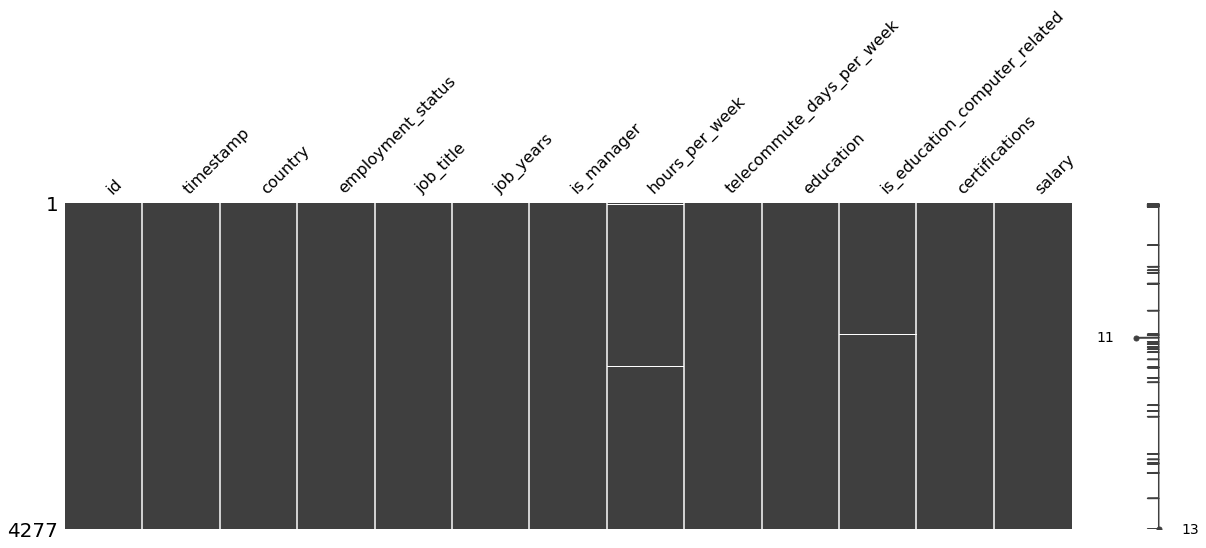

In [ ]:
# visualize the distribution of missing values.
mno.matrix(data, figsize = (20, 6))

##### We have missing vals in hours_per_week and telecommute_days_per_week columns  which are continous variables. The simplest way to deal with them is to impute using median value.

In [ ]:
# replace NANs in hours_per_week with median value of the column  
data.loc[data['hours_per_week'].isna(), 'hours_per_week'] = data['hours_per_week'].median()
data.loc[data['telecommute_days_per_week'].isna(), 'telecommute_days_per_week'] = data['telecommute_days_per_week'].median()

##### Next We have the some missing values in is_education_computer_related column which is a categorical variable. So we can't just impute these missing values. Best way to deal with it is to remove all rows for which this column has a nan.

In [ ]:
# drop missing vals
data = data.dropna()

In [ ]:
# now check total missing vals in every column
data.isnull().sum()

id                               0
timestamp                        0
country                          0
employment_status                0
job_title                        0
job_years                        0
is_manager                       0
hours_per_week                   0
telecommute_days_per_week        0
education                        0
is_education_computer_related    0
certifications                   0
salary                           0
dtype: int64

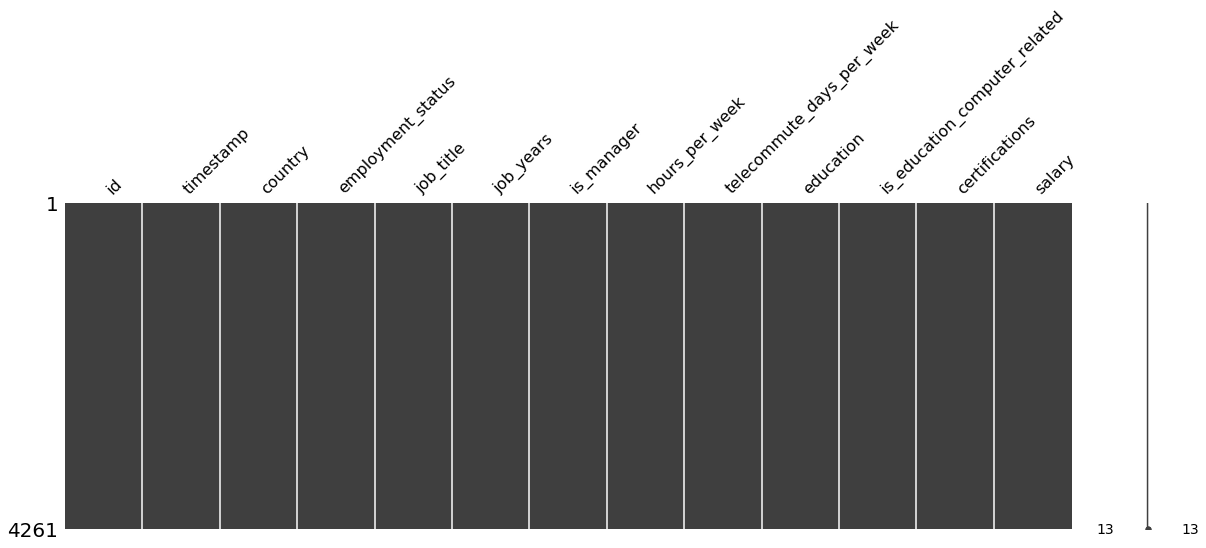

In [ ]:
# Confirm that all missing values are gone.
mno.matrix(data, figsize = (20, 6))

## Visualization, Modeling, Machine Learning

Build a model that can predict salary and identify how different features influence their decision? Please explain your findings effectively to technical and non-technical audiences using comments and visualizations, if appropriate.
- **Build an optimized model that effectively solves the business problem.**
- **The model would be evaluated on the basis of mean absolute error.**
- **Read the test.csv file and prepare features for testing.**

In [ ]:
# Loading Test data
test = pd.read_csv('test.csv')
test.shape

(1070, 12)

In [ ]:
# Print first couple of rows of test data
test.head()

,id,timestamp,country,employment_status,job_title,job_years,is_manager,hours_per_week,telecommute_days_per_week,education,is_education_computer_related,certifications
0,1,12/13/2018 10:23:29,Ukraine,Full time,Developer,5.0,No,40.0,5,Doctorate/PhD,Yes,Yes
1,2,12/21/2017 3:51:48,United Kingdom,Full time,Developer,10.0,Yes,40.0,1,None (no degree completed),Unknown,No
2,3,12/23/2017 12:31:05,United States,Full time,Developer,3.0,No,40.0,0,Associates (2 years),Yes,Yes
3,4,12/14/2017 22:09:43,Canada,Full time,Analyst,5.0,No,40.0,0,Bachelors (4 years),Yes,No
4,5,1/2/2018 13:29:11,United States,Full time,DBA,5.0,Yes,40.0,0,Bachelors (4 years),Yes,No


In [ ]:
# check if there are any missing vals in test data or not
test.isnull().sum()

id                                0
timestamp                         0
country                           0
employment_status                 0
job_title                         0
job_years                         0
is_manager                        0
hours_per_week                   13
telecommute_days_per_week         0
education                         0
is_education_computer_related     0
certifications                    0
dtype: int64

In [ ]:
# impute missing vals in hours_per_week column in test data with median value 
test.loc[test['hours_per_week'].isna(), 'hours_per_week'] = test['hours_per_week'].median()

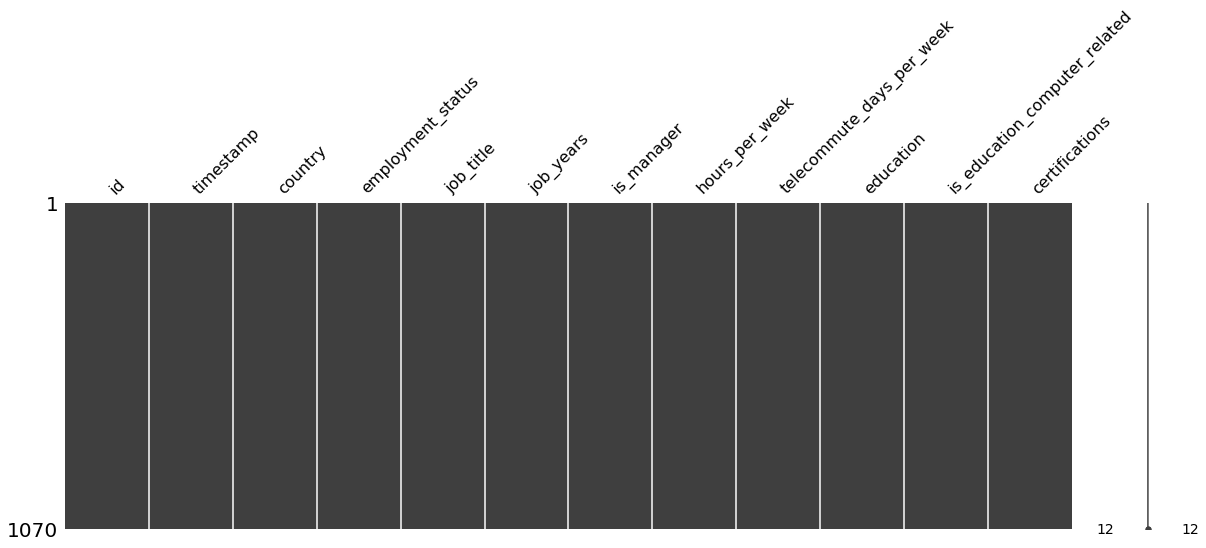

In [ ]:
# Confirm that all missing values are gone in test data.
mno.matrix(test, figsize = (20, 6))

In [ ]:
# let's encode the categorical features in data only for analysis

train_data = data.copy()

cols = ['employment_status', 'job_title', 'is_manager', 'certifications', 
        'education', 'is_education_computer_related']

for c in cols:
    for i, item in enumerate(train_data[c].unique().tolist()):
        train_data.loc[train_data[c] == item, c] = i

    print("Actual values in column:", c, "\n",  data[c].unique().tolist(), '\n')
    print("Encoded values in column:", c, "\n", train_data[c].unique().tolist(), '\n')
        

Actual values in column: employment_status 
 ['Full time', 'Independent or freelancer or company owner', 'Part time'] 

Encoded values in column: employment_status 
 [0, 1, 2] 

Actual values in column: job_title 
 ['Developer', 'DBA', 'Other', 'Data Scientist', 'Manager', 'Architect', 'Analyst', 'Engineer', 'Sales', 'Analytics consultant', 'Principal database engineer', 'Sr Consultant '] 

Encoded values in column: job_title 
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11] 

Actual values in column: is_manager 
 ['Yes', 'No'] 

Encoded values in column: is_manager 
 [0, 1] 

Actual values in column: certifications 
 ['No', 'Yes'] 

Encoded values in column: certifications 
 [0, 1] 

Actual values in column: education 
 ['Bachelors (4 years)', 'Masters', 'Associates (2 years)', 'None (no degree completed)', 'Doctorate/PhD'] 

Encoded values in column: education 
 [0, 1, 2, 3, 4] 

Actual values in column: is_education_computer_related 
 ['Yes', 'No', 'Unknown'] 

Encoded values in column: is_e

### Visualizations

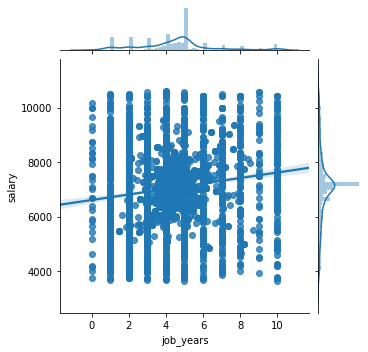

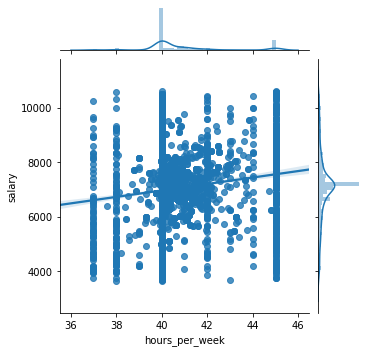

In [ ]:
# joint plots for numeric variables
cols = ["job_years", "hours_per_week"]
for c in cols:
    sns.jointplot(x=c, y="salary", data=data, kind = 'reg', height = 5)
plt.show()

##### From the plots above we can clearly see that job_years has a relation with salary. The more job_years means more monthly earning(salary). Similar trend is visible for hours_per_week variable in relation to the target variable (salary).

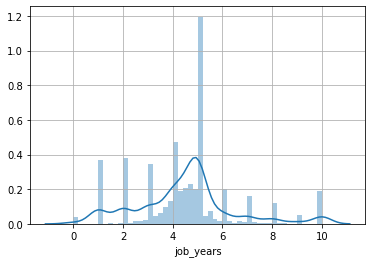

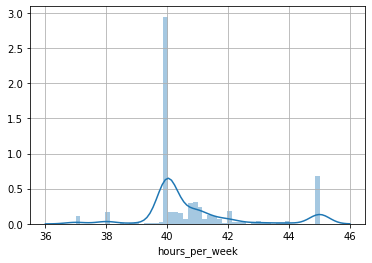

In [ ]:
# dist plots for numeric variables
cols = ["job_years", "hours_per_week"]
for c in cols:
    sns.distplot(data[c])
    plt.grid()
    plt.show()

##### The distributions plotted above are interesting. For job_years, we see a slightly skewed distribution which shows that majority of professionals in our data have less than 10 years of total job experience. For hours_per_week we see a somewhat bimdal distribution showing that most people work from 40 to 45 hours per week.

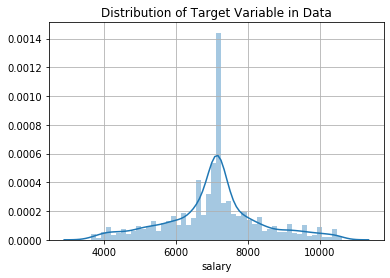

max: 10625.0
min: 3622.0


In [ ]:
# distribution of target variable
sns.distplot(data['salary'])
plt.grid()
plt.title('Distribution of Target Variable in Data')
plt.show()
print('max:', np.max(data['salary']))
print('min:', np.min(data['salary']))

##### For target variable i.e. salary we can see a smooth normal distribution with a bulge at the mean salary point.

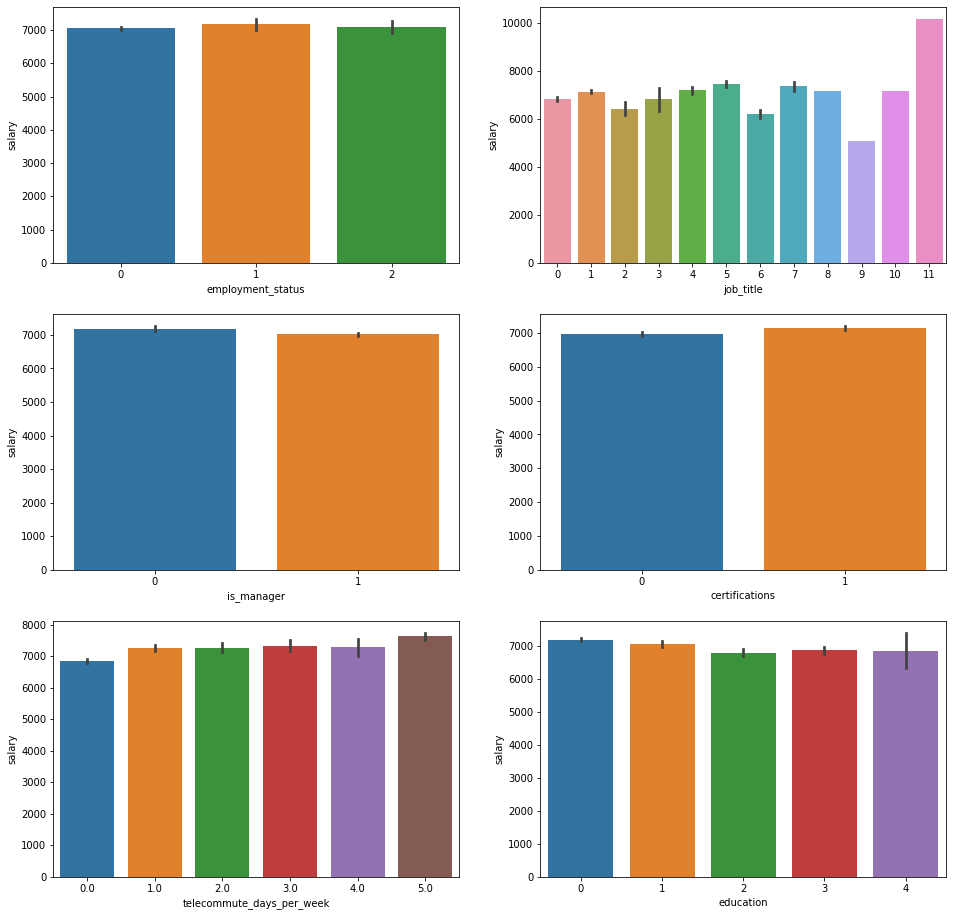

In [ ]:
# bar plots for categorical features
cols = ['employment_status', 'job_title', 'is_manager', 'certifications', 
        'telecommute_days_per_week', 'education']
fig, axes = plt.subplots(3, 2, figsize=(16, 16))
for i, c in enumerate(cols):
    ax = axes.ravel()[i]
    sns.barplot(x=c, y="salary", ax=ax, data=train_data)

In [ ]:
# print actual values for encoded labels of a column against which salary is highest
print(data['employment_status'].unique().tolist()[1])
print(data['job_title'].unique().tolist()[11])
print(data['is_manager'].unique().tolist()[0])
print(data['certifications'].unique().tolist()[1])
print(data['telecommute_days_per_week'].unique().tolist()[5])
print(data['education'].unique().tolist()[0])

Independent or freelancer or company owner
Sr Consultant 
Yes
Yes
3.0
Bachelors (4 years)


#####  We see the following trends from above plots:
1. People with employment_status = 1 i.e. 'Independent consultant, contractor, freelancer,  or company owner' earn more than full and half time employees. 
2. People with job_title Sr Consultant earn more than other professionals. 
3. We also see that people who hold manegrial positions earn more than those who don't.
4. People with certifications have little difference in monthly salary than those who don't. 
5. For people having 3 or more telecommute_days_per_week, have higher salaries which might suggest that these people are actually independent contractors or freelancers. 
6. As for education, the trend shows taht people with a Bachelors degree of 4 years earn more as compared to others. 

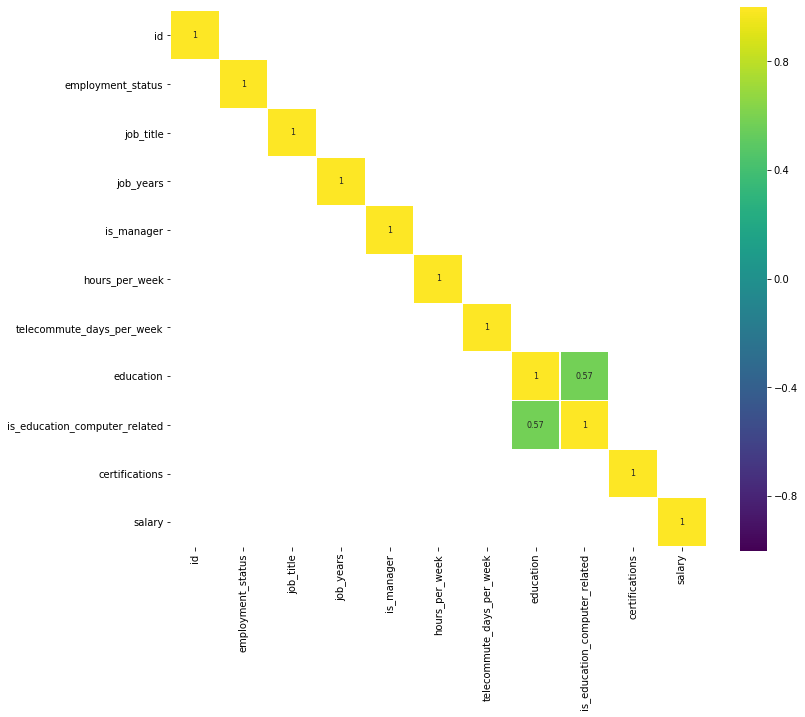

In [ ]:
# Correlation heatmap
corr = train_data.corr() 
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.3) | (corr <= -0.2)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)

##### The correlation matrix above shows that there is no correlation among the features.

### Feature Encoding and Normalization

Before training the model, we should perform one-hot encoding for all categorical/discrete variables, normalize continuous variables and then combine all data to form the training set.

In [ ]:
# create another copy of dataset and append encoded features to it
data_train = data.copy()

# drop id, timestamp and country columns
data_train = data_train.drop(columns=['id', 'timestamp'])

In [ ]:
# select categorical features
cat_cols = [c for c in data_train.columns if data_train[c].dtype == 'object' 
            and c not in ['is_manager', 'certifications']]
cat_data = data_train[cat_cols]
cat_cols

['country',
 'employment_status',
 'job_title',
 'education',
 'is_education_computer_related']

In [ ]:
# encode binary variables
binary_cols = ['is_manager', 'certifications']
for c in binary_cols:
    data_train[c] = data_train[c].replace(to_replace=['Yes'], value=1)
    data_train[c] = data_train[c].replace(to_replace=['No'], value=0)

In [ ]:
# one-hot encoding of categorical features
data_encoding = {}
frames = []
for col in cat_cols:
    print(col)
    lb = LabelBinarizer()
    data_encoding[col] = lb
    result = lb.fit_transform(data_train[col].values.tolist())
    dfOneHot = pd.DataFrame(result, columns = [col + ': ' + c for c in lb.classes_])
    frames.append(dfOneHot)

country
employment_status
job_title
education
is_education_computer_related


In [ ]:
# remove feature that were one-hot encoded from original data
data_train = data_train.drop(columns=cat_cols)

In [ ]:
# concatenate all dataframes
final_data = pd.concat(frames, axis=1)
final_data.shape

(4261, 101)

In [ ]:
# adding remaining cols
for c in data_train.columns:
    final_data[c] = data_train[c].values
print(final_data.shape)
print(final_data.isnull().values.any())

(4261, 107)
False


In [ ]:
# select numerical features
num_cols = [c for c in data_train.columns if c not in cat_cols and c not in binary_cols and c != 'salary']
num_cols

['job_years', 'hours_per_week', 'telecommute_days_per_week']

In [ ]:
# Apply standard scaling on numeric data 
scaler = StandardScaler()
scaler.fit(final_data[num_cols])
final_data[num_cols] = scaler.transform(final_data[num_cols])



**The management wants to know the most important features for the model.**

> #### Task:
- **Visualize the top 20 features and their feature importance.**


### Train Test Split

In [ ]:
y = final_data['salary']
X = final_data.drop(columns=['salary'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("Training Set Dimensions:", X_train.shape)
print("Validation Set Dimensions:", X_test.shape)

Training Set Dimensions: (3408, 106)
Validation Set Dimensions: (853, 106)


### Model Training

In [ ]:
# train random forest regression model
randomf = RandomForestRegressor()
randomf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
print('MAPE for train set:', np.mean(np.abs((y_train - randomf.predict(X_train))) / y_train) * 100)
print('MAPE for validation set:', np.mean(np.abs((y_test - randomf.predict(X_test))) / y_test) * 100)

MAPE for train set: 5.009669601035914
MAPE for validation set: 10.91169026812779


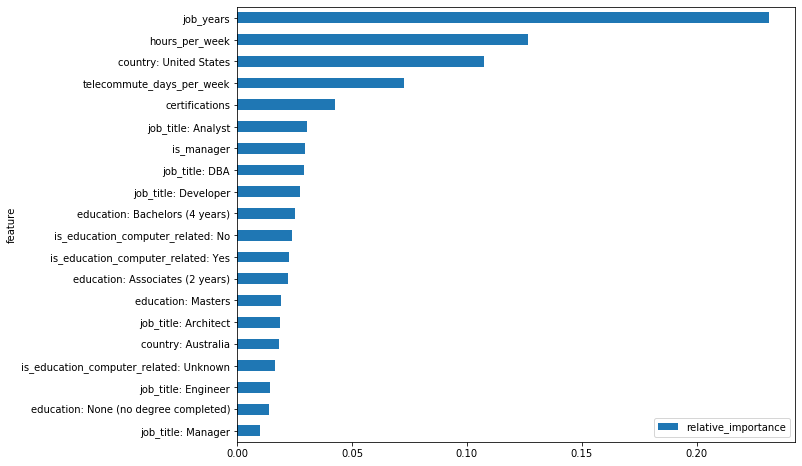

In [ ]:
# compute feature importance from random forest regression model
feature_imp=pd.DataFrame()
for feature,imp in zip(X_train.columns,randomf.feature_importances_):
    temp=pd.DataFrame([feature,imp]).T
    feature_imp=feature_imp.append(temp)
feature_imp.columns=['feature','relative_importance']
feature_imp.sort_values(by='relative_importance',inplace=True)
feature_imp.set_index('feature',inplace=True)
feature_imp.iloc[-20:,:].plot(kind='barh',figsize=(10,8))
plt.show()

> #### Task:
- **Submit the predictions on the test dataset using the optimized model** <br/>
    For each record in the test set (`test.csv`), predict the value of the `salary` variable. Submit a CSV file with a header row and one row per test entry. 

The file (`submissions.csv`) should have exactly 2 columns:
   - **id**
   - **salary**

### Encode and Normalize features of Test Data

In [ ]:
# store ids and drop column
test_data = test.copy()
ids = test_data['id']
test_data = test_data.drop(columns=['id', 'timestamp'])

In [ ]:
# encode binary variables
binary_cols = ['is_manager', 'certifications']
for c in binary_cols:
    test_data[c] = test_data[c].replace(to_replace=['Yes'], value=1)
    test_data[c] = test_data[c].replace(to_replace=['No'], value=0)

In [ ]:
# perform one-hot encoding for test data
test_frames = []
for col in cat_cols:
    print(col)
    lb = data_encoding[col]
    result = lb.transform(test_data[col].values.tolist())
    dfOneHot = pd.DataFrame(result, columns = [col + ': ' + c for c in lb.classes_])
    test_frames.append(dfOneHot)

country
employment_status
job_title
education
is_education_computer_related


In [ ]:
# remove feature that were one-hot encoded
test_data = test_data.drop(columns=cat_cols)

In [ ]:
# concatenate all dataframes
encoded_test_data = pd.concat(test_frames, axis=1)
encoded_test_data.shape

(1070, 101)

In [ ]:
# adding remaining cols
for c in test_data.columns:
    encoded_test_data[c] = test_data[c].values
print(encoded_test_data.shape)
print(encoded_test_data.isnull().values.any())

(1070, 106)
False


In [ ]:
# standardize test data
encoded_test_data[num_cols] = scaler.transform(encoded_test_data[num_cols])

### Take Predictions for Test Data

In [ ]:
# predictions on test data
prediction = randomf.predict(encoded_test_data)

In [ ]:
# Create a dataframe of ids and demand predictions
df = pd.DataFrame({'id':actual['id'], 'salary': prediction})

# Submission
df.to_csv('submissions.csv',index=False)